# AIM-5001 Final Project - Movie Ratings
Ke Chen
## Introduction
The entertainment industry is developing fast along with streaming companies have emerged. Nowadays, it is easy to stream a movie of one’s preference, simply by using one of many streaming services. Thus, viewers have many choices to evaluate their subscriptions according to the streaming service offerings. For example, as of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users. There are also many other rating platforms such as Rotten Tomatoes, Douban in China and so on. As rating systems vary, it is confusing to tell which rating result is trustable. Oftentimes, blind worship of viewers’ ratings and review comments is misleading. In this project, the relationships between viewer’s ratings and movie characteristics, as well as the streaming services offerings characteristics will be explored. The research results will reflect the viewer’s rating preferences and provide a reference for new audiences to rationally select movies based on ratings.
## 0. Data and Libraries Preparation
The data to be used is a Kaggle!dataset called MoviesOnStreamingPlatforms_updated. The raw data will be read in Jupyter Notebook first. For further manipulation and questions analysis, specific columns will be selected after general view of the raw data.

In [1]:
# Import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get raw data of the file
Movies_raw = pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/AIM-5001/master/MoviesOnStreamingPlatforms_updated.csv')
Movies_raw.head(3)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


For 'Unnamed: 0' column, it does not make any sense as it is the same as the index. The Rotten Tomatoes rating column contains "%" signs, which are not convenient for further use. The columns will be fixed for getting a better view of the raw data.

In [2]:
# drop 'Unnamed: 0' column
Movies = Movies_raw.drop(['Unnamed: 0'], axis =1)
# get rid of special characters
Movies['Rotten Tomatoes']=Movies['Rotten Tomatoes'].str.strip().str[:-1]
# view the data
Movies.head(3)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


General information and missing values of the fixed Movies data frame will be checked below.

In [3]:
# get info of Movies
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


The Year, Age, Type, Directors, Genres, Country, Languages, Runtime and four streaming services are categorical values. IMDb and Rotten Tomatoes are numeric values. For Rotten Tomatoes ratings, the data type is object, which needs to be converted to numeric while doing analysis. The four streaming services Netflix, Hulu, Prime Video and Disney+ are four categorical values which are shown as column names and filled with dummy data. Therefore, the untidy format needs to be converted to long format when analysis regarding streaming services will be conducted.

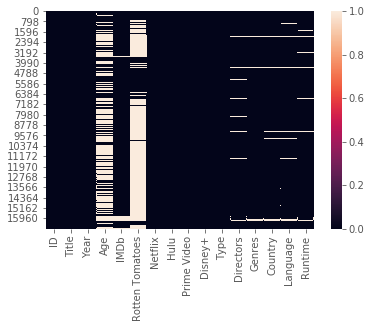

In [4]:
# Use heatmap to see the missing values of the Movies data
plt.style.use('ggplot')
sns.heatmap(Movies.isnull())
plt.show()

As shown in the heatmap, all white part are the missing values. Movies data contains 16744 rows but has many missing values on age and Rotten Tomatoes ratings. The IMDb, directors, genres, country, language, and runtime columns have fewer missing values. The large number of missing values of Rotten Tomatoes column's will be an obstacle for further analysis. For keeping enough amount of data, the best way is to re-create new data frame, investigate and analyze selected columns separately for each topic.

## 1. Do the factors in the dataset influence the ratings?
According to the overview of the dataset, there were many categorical values. Streaming services and languages will be mainly focused on in this question to see the ratings characteristics. 
### 1.1 Do streaming services have an influence over the movie ratings? 
#### 1.1.1 EDA of streaming services and movie ratings
The IMDb ratings and Rotten Tomatoes ratings are two of the most popular rating systems. Due to the unequal number of missing values, the two ratings columns as well as the streaming services will be selected separately to see the difference. As the original table has all the streaming services as column names with dummy data. The selected dataframe need to be melted to long format.

In [5]:
# select the 'ID','IMDb','Netflix','Hulu','Prime Video','Disney+' columns as a new dataframe for analyze, drop missing values 
imdb_svc=Movies[['IMDb','Netflix','Hulu','Prime Video','Disney+']].dropna().reindex()
# melt the table by streaming services
imdb_svc_melted=pd.melt(imdb_svc,id_vars=['IMDb'],var_name='streaming svc')
# only keep the streaming service value is 1 item, which means it was shown on corresponding streaming services
imdb_svc_melted=imdb_svc_melted[imdb_svc_melted['value']==1][['streaming svc','IMDb']]
# check the long format table
imdb_svc_melted.head()

,streaming svc,IMDb
0,Netflix,8.8
1,Netflix,8.7
2,Netflix,8.5
3,Netflix,8.5
4,Netflix,8.8


In [6]:
# select the 'ID','Rotten Tomatoes','Netflix','Hulu','Prime Video','Disney+' columns as a new dataframe for analyze, drop missing values 
rt_svc=Movies[['Rotten Tomatoes','Netflix','Hulu','Prime Video','Disney+']].dropna().reindex()
# melt the table by streaming services
rt_svc_melted=pd.melt(rt_svc,id_vars=['Rotten Tomatoes'],var_name='streaming svc')
# only keep the value is 1 for indicating the movie was shown through this streaming service
rt_svc_melted=rt_svc_melted[rt_svc_melted['value']==1][['streaming svc','Rotten Tomatoes']]
# convert the 'Rotten Tomatoes' data type as int64 from dtype object
rt_svc_melted['Rotten Tomatoes']=rt_svc_melted['Rotten Tomatoes'].astype('int64')
# check the long format table
rt_svc_melted.head()

,streaming svc,Rotten Tomatoes
0,Netflix,87
1,Netflix,87
2,Netflix,84
3,Netflix,96
4,Netflix,97


The two long format tables statistical values and visualization of IMDb and Rotten Tomatoes ratings with histograms and box plots will be shown as below for exploratory data analysis. 

In [7]:
# IMDb ratings info
imdb_svc_melted.describe()

,IMDb
count,16805.000000
mean,5.911598
std,1.342295
min,0.000000
25%,5.100000
50%,6.100000
75%,6.900000
max,9.300000


In [8]:
# Rotten Tomatoes ratings info
rt_svc_melted.describe()

,Rotten Tomatoes
count,5486.000000
mean,65.109369
std,26.796830
min,2.000000
25%,43.000000
50%,71.000000
75%,88.000000
max,100.000000


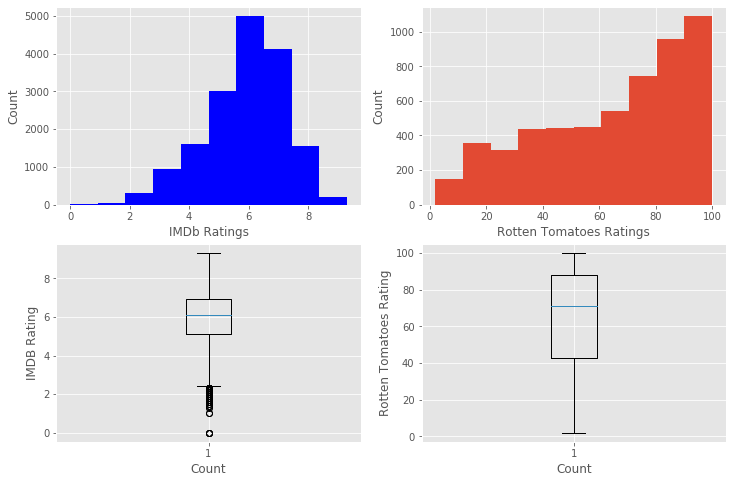

In [9]:
# create subplots for histograms and IMDb and Rotten Tomatoes ratings 
fig, [[ax1,ax2],[ax3,ax4]]=plt.subplots(nrows=2,ncols=2, figsize=(12,8))
# histogram for IMDb Ratings
ax1.hist(imdb_svc_melted['IMDb'],color='blue')
ax1.set_xlabel("IMDb Ratings")
ax1.set_ylabel("Count")
# histogram for Rotten Tomatoes Ratings
ax2.hist(rt_svc_melted['Rotten Tomatoes'])
ax2.set_xlabel("Rotten Tomatoes Ratings")
ax2.set_ylabel("Count")
# boxplot for IMDb Ratings
ax3.boxplot(imdb_svc_melted['IMDb'])
ax3.set_xlabel("Count")
ax3.set_ylabel("IMDB Rating")
# boxplot for Rotten Tomatoes Ratings
ax4.boxplot(rt_svc_melted['Rotten Tomatoes'])
ax4.set_xlabel("Count")
ax4.set_ylabel("Rotten Tomatoes Rating")
# show the plots
plt.show()

IMDb ratings are mostly between 4 and 8. The upper and lower quartiles of the data are around 5 and 7. The minimum and maximum points are around 2.5 and 9.5 respectively. However, there are many outliers shown in the boxplot, which means there are many extremely low ratings. For Rotten Tomatoes ratings, the ratings are mostly higher than 60, as higher scores have more frequencies. The upper and lower quartiles of the data are around 40 and 90. The minimum and maximum points are around 0 and 100 respectively. No outliers are shown. <br>

#### 1.1.2 Streaming service and ratings research
In the following part, average ratings of each streaming service will be plotted with bar plots. Also, in order to check if the difference of the average ratings are significant, Scipy library will be imported for ANOVA analysis.

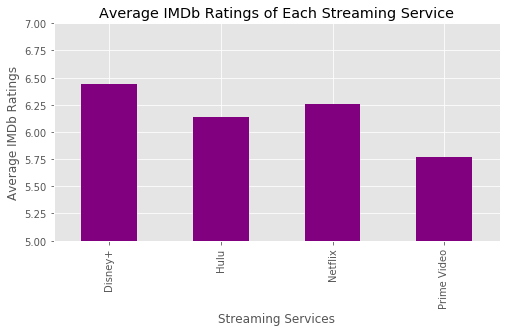

In [10]:
# group by the streaming services and plot the mean ratings of IMDb
imdb_svc_melted_plt=imdb_svc_melted.groupby('streaming svc')['IMDb'].mean().plot.bar(title='Average IMDb Ratings of Each Streaming Service',figsize=(8,4), color='purple')
# set x, y labels
imdb_svc_melted_plt.set_xlabel('Streaming Services')
imdb_svc_melted_plt.set_ylabel('Average IMDb Ratings')
# after testing, set y tick range to make plot clearer
imdb_svc_melted_plt.set_ylim([5,7])
plt.show()

In [11]:
# import scipy library for one way ANOVA
from scipy.stats import f_oneway
# get the array style ratings of each streaming service
imdbds=imdb_svc_melted[imdb_svc_melted['streaming svc']=='Disney+']['IMDb'].to_numpy()
imdbhl=imdb_svc_melted[imdb_svc_melted['streaming svc']=='Hulu']['IMDb'].to_numpy()
imdbnf=imdb_svc_melted[imdb_svc_melted['streaming svc']=='Netflix']['IMDb'].to_numpy()
imdbpv=imdb_svc_melted[imdb_svc_melted['streaming svc']=='Prime Video']['IMDb'].to_numpy()
# apply one way ANOVA
f_oneway(imdbds, imdbhl, imdbnf,imdbpv)

F_onewayResult(statistic=159.92381740848944, pvalue=3.2809229543734783e-102)

The p-value is smaller than 0.05, which means the differences between the 4 group means are statistically significant.

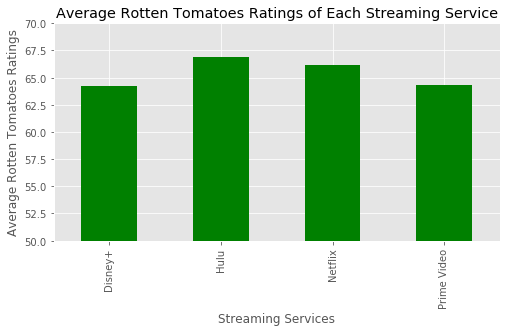

In [12]:
# group by the streaming services and plot the mean ratings of Rotten Tomatoes
rt_svc_melted_plt=rt_svc_melted.groupby('streaming svc')['Rotten Tomatoes'].mean().plot.bar(title='Average Rotten Tomatoes Ratings of Each Streaming Service',figsize=(8,4), color='green')
# set x, y labels
rt_svc_melted_plt.set_xlabel('Streaming Services')
rt_svc_melted_plt.set_ylabel('Average Rotten Tomatoes Ratings')
# after testing, set y tick range to make plot clearer
rt_svc_melted_plt.set_ylim([50,70])
plt.show()

In [13]:
# get the array style ratings of each streaming service
rtds=rt_svc_melted[rt_svc_melted['streaming svc']=='Disney+']['Rotten Tomatoes']
rthl=rt_svc_melted[rt_svc_melted['streaming svc']=='Hulu']['Rotten Tomatoes']
rtnf=rt_svc_melted[rt_svc_melted['streaming svc']=='Netflix']['Rotten Tomatoes']
rtpv=rt_svc_melted[rt_svc_melted['streaming svc']=='Prime Video']['Rotten Tomatoes']
# apply one way ANOVA
f_oneway(rtds, rthl,rtnf,rtpv)

F_onewayResult(statistic=2.675602168477362, pvalue=0.04556602618077086)

The p-value is smaller than 0.05, which means the differences between the 4 group means are statistically significant.

The average of IMDb ratings of Disney+ and Netflix are higher than 6.25. Hulu is lower than 6.25, while Prime Video has about 5.75, which is the lowest average among the 4 streaming services. As the average Rotten Tomatoes ratings, the highest 2 services are Hulu and Netflix, which are over 65. Movies on Disney+ and Prime Video did not have outstanding ratings, which are lower than 65. Both IMDb and Rotten Tomatoes average ratings of the four streaming services are statistically significant.

### 1.2 Does the movie language influence the ratings? Which languages have the highest ratings?
#### 1.2.1 EDA of languages
Many movies has more than one language officially issued on the record. The first step is to separate the multi-languages into different rows. After splitting the languages, the language types and most popular languages will be investigated.

In [14]:
# select all the useful columns for language analysis
lang_ratings=Movies[['ID','IMDb', 'Rotten Tomatoes','Language']]
# split the languages into different rows
lang_ratings=lang_ratings.assign(Language=lang_ratings['Language'].str.split(',')).explode('Language').reset_index().drop(['index'], axis =1)
# show the new table lang_ratings
lang_ratings.head()

,ID,IMDb,Rotten Tomatoes,Language
0,1,8.8,87,English
1,1,8.8,87,Japanese
2,1,8.8,87,French
3,2,8.7,87,English
4,3,8.5,84,English


In [15]:
# get language information
lang_ratings['Language'].unique()

array(['English', 'Japanese', 'French', 'Italian', 'Spanish', 'German',
       'Russian', 'Hebrew', 'Arabic', 'Nepali', 'Hindi', 'Latin', 'Greek',
       'American Sign Language', 'Nyanja', 'Afrikaans', 'Zulu', 'Xhosa',
       'Southern Sotho', 'Korean', 'Hawaiian', 'Saami', 'Swedish',
       'Cantonese', 'Mandarin', 'Sinhalese', 'Portuguese',
       'Japanese Sign Language', 'Irish', 'Awadhi', 'Urdu', 'Telugu',
       'Tamil', 'Lingala', 'Persian', 'Kurdish', 'Bengali', 'Thai',
       'East-Greenlandic', 'Berber languages', 'Danish', 'Hungarian',
       'Turkish', 'Swahili', 'Filipino', 'Yiddish', 'Ukrainian',
       'Cheyenne', 'Marathi', 'Norwegian', 'Indonesian', 'Romanian',
       'Estonian', 'Vietnamese', 'Polynesian', 'Aboriginal', 'Quechua',
       'Khmer', nan, 'Scottish Gaelic', 'Flemish', 'Slovenian', 'Tagalog',
       'Georgian', 'Turkmen', 'Catalan', 'Icelandic', 'Tibetan',
       'Min Nan', 'Dutch', 'Mapudungun', 'Akan', 'Pushto', 'Basque',
       'Polish', 'Chinese', 'Se

There are different kinds of languages are recorded in the dataset. Some of the languages are not popular, and some languages are the same but use different names or only dialect. We will fix the situation and get the top 20 popular languages based on a bar plot.

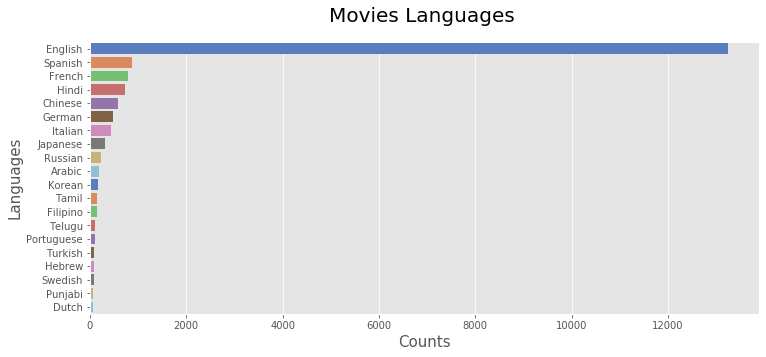

In [16]:
# combine some dialects into Chinese category. Also, Tagalog into Filipino
lang_ratings['Language'] = lang_ratings['Language'].replace(['Mandarin','Cantonese','Shanghainese','Hokkien','Hakka'],'Chinese')
lang_ratings['Language'] = lang_ratings['Language'].replace('Tagalog','Filipino')
# invesigate the count of each language by creating a bar plot
plt.figure(figsize=(12,5))
lang_count= lang_ratings['Language'].value_counts()[:20]
sns.barplot(x=lang_count,y=lang_count.index,palette='muted')
# set title, labels and show
plt.title("Movies Languages ",size=20,pad=20)
plt.xlabel("Counts",size=15)
plt.ylabel("Languages", size=15)
plt.show()

The top 20 languages are languages having the most movies count. The following exposure will be based on the 20 languages.
#### 1.2.2 Languages and movie ratings research
The average of IMDb ratings as well as Rotten Tomatoes ratings of the 20 languages will be calculated to see the differences among languages.

In [17]:
# select all the useful columns for language analysis, also 2 tables will be created to avoid too much missing information
lang_imdb=lang_ratings[['ID','IMDb','Language']].dropna()
lang_rt=lang_ratings[['ID','Rotten Tomatoes','Language']].dropna()
# rotten tomatoes rating data type need to be converted
lang_rt['Rotten Tomatoes']=lang_rt['Rotten Tomatoes'].astype('int64')
# create the 20 languages list
language_list=['English','Spanish','French','Hindi','Chinese','German','Italian',
               'Japanese','Russian','Arabic','Korean','Tamil','Filipino','Telugu','Portuguese','Turkish','Hebrew',
              'Swedish','Punjabi','Dutch']

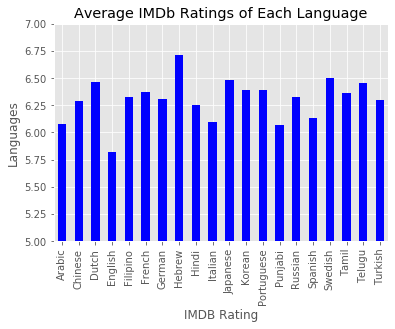

In [18]:
# plot the IMDb ratings of the movies' languages included in language list
ax5=lang_imdb[lang_imdb['Language'].isin(language_list)].groupby('Language')['IMDb'].mean().plot.bar(title='Average IMDb Ratings of Each Language', color='blue')
# set plot ticks and labels
ax5.set_xlabel("IMDB Rating")
ax5.set_ylabel("Languages")
ax5.set_ylim([5,7])
plt.show()


In [19]:
# the average imdb ratings of top 20 popular languages
lang_imdb[lang_imdb['Language'].isin(language_list)].groupby('Language')['IMDb'].mean()

Language
Arabic        6.079558
Chinese       6.293739
Dutch         6.459701
English       5.822641
Filipino      6.326718
French        6.369084
German        6.304017
Hebrew        6.709639
Hindi         6.255463
Italian       6.097465
Japanese      6.479618
Korean        6.391908
Portuguese    6.390476
Punjabi       6.068182
Russian       6.328182
Spanish       6.133643
Swedish       6.498750
Tamil         6.362838
Telugu        6.458716
Turkish       6.297826
Name: IMDb, dtype: float64

In [20]:
# use ANOVA to check if the highest and lowest average has significant difference
imdb_hebrew=lang_imdb[lang_imdb['Language']=='Hebrew']['IMDb']
imdb_english=lang_imdb[lang_imdb['Language']=='English']['IMDb']
# apply one way ANOVA
f_oneway(imdb_hebrew,imdb_english)

F_onewayResult(statistic=35.00329001849786, pvalue=3.3740188261427173e-09)

The highest and lowest average IMDb ratings of the 20 languages are statistically significant.

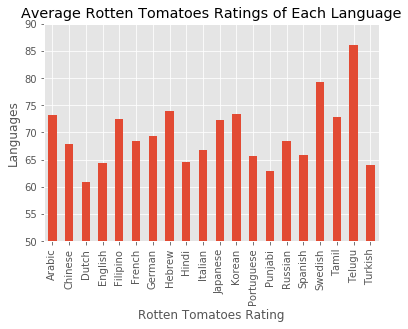

In [21]:
# plot the rotten tomatoes ratings of the movies languages included in language list
ax6=lang_rt[lang_rt['Language'].isin(language_list)].groupby('Language')['Rotten Tomatoes'].mean().plot.bar(title='Average Rotten Tomatoes Ratings of Each Language')
ax6.set_xlabel("Rotten Tomatoes Rating")
ax6.set_ylabel("Languages")
ax6.set_ylim([50,90])
plt.show()

In [22]:
# the average rotten tomatoes ratings of top 20 popular languages
lang_rt[lang_rt['Language'].isin(language_list)].groupby('Language')['Rotten Tomatoes'].mean()

Language
Arabic        73.141026
Chinese       67.902564
Dutch         60.862069
English       64.327869
Filipino      72.400000
French        68.487640
German        69.290749
Hebrew        74.024390
Hindi         64.612745
Italian       66.803279
Japanese      72.217391
Korean        73.313433
Portuguese    65.673469
Punjabi       62.833333
Russian       68.469565
Spanish       65.826087
Swedish       79.303030
Tamil         72.769231
Telugu        86.090909
Turkish       64.062500
Name: Rotten Tomatoes, dtype: float64

In [23]:
# use ANOVA to check if the highest and lowest average has significant difference
rt_telugu=lang_rt[lang_rt['Language']=='Telugu']['Rotten Tomatoes']
rt_dutch=lang_rt[lang_rt['Language']=='Dutch']['Rotten Tomatoes']
# apply one way ANOVA
f_oneway(rt_telugu,rt_dutch)

F_onewayResult(statistic=8.490473890723475, pvalue=0.005952380410119453)

The highest and lowest average Rotten Tomatoes ratings of the 20 languages are statistically significant.<br>
<br>
The top 5 high average IMDb ratings movie languages are Hebrew, Japanese, Dutch, Telugu and Swedish. Hebrew movies average IMDb rating even reaches almost 6.75. English movies has the lowest average IMDb rating, which is just over 5.75. The top 5 high average Rotten Tomatoes ratings movie languages are Telugu, Swedish, Hebrew, Arabic and Korean. Telugu movies even reaches higher than 85% average for Rotten Tomatoes ratings. Interestingly, Dutch movies get the lowest average rating of Rotten Tomatoes. It is totally opposite to the result of IMDb.
### 1.3 Did the year factor affect the number of streaming service collaborations?
Streaming services update quickly with technique development. Do the movies have preference to select streaming services with the year changing? As movie industries themselves will have a market research, the movie companies’ selection might be a side reflect of audiences’ preference. The year and streaming services columns will be selected for the further discussion.

In [24]:
# select year and streaming services columns as a new dataframe for analyze, drop missing values 
year_svc=Movies[['Year','Netflix','Hulu','Prime Video','Disney+']].dropna().reindex()
# melt the table
year_svc_melted=pd.melt(year_svc,id_vars=['Year'],var_name='streaming svc')
year_svc_melted=year_svc_melted[year_svc_melted['value']==1][['streaming svc','Year']]
year_svc_melted.head()

,streaming svc,Year
0,Netflix,2010
1,Netflix,1999
2,Netflix,2018
3,Netflix,1985
4,Netflix,1966


#### 1.3.1 EDA of year column
The movies numbers of each year will be graphed with histogram as below.

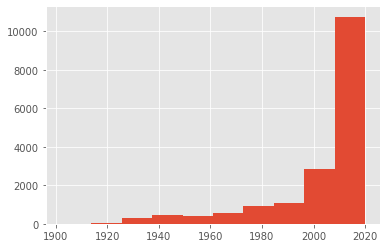

In [25]:
# movie numbers of each year distribution
plt.hist(year_svc_melted['Year'])
plt.show()

The movies on the record shows the range are between 1900-2020. After 2000, there was a boost of movies amount increase.
#### 1.3.2 Split the year distribution by streaming services
Now we are going to use a line plot to see the on-air movies trend of each streaming service along with the year.

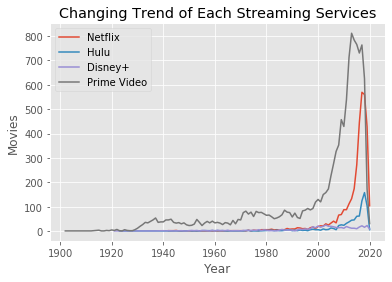

In [26]:
# plotting 4 lines to show the trend of yearly change of the number of movies on air in different streaming services
# for netflix
nf=year_svc_melted[year_svc_melted['streaming svc']=='Netflix'].groupby('Year')['streaming svc'].count().plot.line()
# for hulu
hl=year_svc_melted[year_svc_melted['streaming svc']=='Hulu'].groupby('Year')['streaming svc'].count().plot.line()
# for disney+
ds=year_svc_melted[year_svc_melted['streaming svc']=='Disney+'].groupby('Year')['streaming svc'].count().plot.line()
# for prime video
pv=year_svc_melted[year_svc_melted['streaming svc']=='Prime Video'].groupby('Year')['streaming svc'].count().plot.line(title='Changing Trend of Each Streaming Services')
pv.set_xlabel("Year")
pv.set_ylabel("Movies")
plt.legend(['Netflix','Hulu','Disney+','Prime Video'])
plt.show()

As shown in the plot. The total amount of movies shown on the 4 streaming services increased dramatically after 2000. It may be caused by the internet technology boost after 2000. The Amazon Prime Video is the most popular streaming service platform of movie companies. The second popular platform is Netflix. Disney+ does not show a obvious change after 2000. 
### 1.4 Do streaming services focus on movie genres?
Streaming services may have their own preferences of movie genres. As we all know, Disney+ primarily distribute the movies produced by The Walt Disney Studios. What about other streaming services? Pie charts of each streaming services will be plotted to show the percentile of each movie genres. Firstly, the table for genre and movies dataset will be selected and reset the format.
#### 1.4.1 EDA of genres column

In [27]:
# select 'Genres','Netflix','Hulu','Prime Video','Disney+' columns as a new dataframe for analyze, drop missing values 
genre_svc=Movies[['Genres','Netflix','Hulu','Prime Video','Disney+']].dropna()
# melt the table
genre_svc_melted=pd.melt(genre_svc,id_vars=['Genres'],var_name='streaming svc')
# split the genres multi-info of each row 
genre_svc_melted=genre_svc_melted.assign(Genres=genre_svc_melted['Genres'].str.split(',')).explode('Genres')
genre_svc_melted=genre_svc_melted[genre_svc_melted['value']==1][['streaming svc','Genres']]
genre_svc_melted.head()

,streaming svc,Genres
0,Netflix,Action
0,Netflix,Adventure
0,Netflix,Sci-Fi
0,Netflix,Thriller
1,Netflix,Action


In [28]:
# movie numbers of each year distribution
genre_svc_melted['Genres'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Western',
       'Animation', 'Family', 'Biography', 'Drama', 'Music', 'War',
       'Crime', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror',
       'Sport', 'Documentary', 'Musical', 'News', 'Short', 'Reality-TV',
       'Talk-Show', 'Game-Show', 'Film-Noir'], dtype=object)

There are 27 genres of movies. What are the percentage of each genre in the four streaming services?
#### 1.4.2 Percentage of genres research
In this section, pie charts will be plotted to see what the main genres of each streaming service platforms are.

In [29]:
# take out each streaming service type and group by genres, count the number of movies
genre_nf = genre_svc_melted[genre_svc_melted['streaming svc']=='Netflix'].groupby(['Genres']).count()
genre_hl = genre_svc_melted[genre_svc_melted['streaming svc']=='Hulu'].groupby(['Genres']).count()
genre_pv = genre_svc_melted[genre_svc_melted['streaming svc']=='Prime Video'].groupby(['Genres']).count()
genre_ds = genre_svc_melted[genre_svc_melted['streaming svc']=='Disney+'].groupby(['Genres']).count()

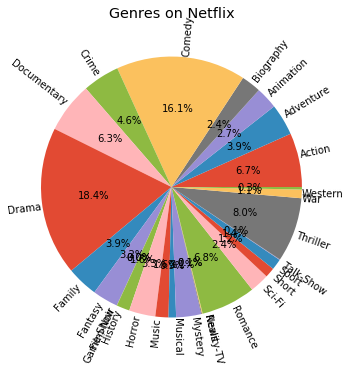

In [30]:
# use pie chart to show the percentage of Netflix.
plt.figure(figsize=(6,6))
plt.pie(genre_nf['streaming svc'],labels = genre_nf.index, autopct = '%1.1f%%',labeldistance = 1,rotatelabels = True)
plt.title('Genres on Netflix')
plt.show()

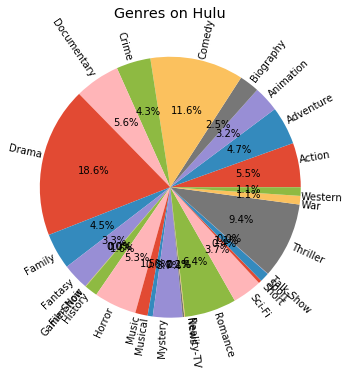

In [31]:
# use pie chart to show the percentage of Hulu.
plt.figure(figsize=(6,6))
plt.pie(genre_hl['streaming svc'],labels = genre_hl.index, autopct = '%1.1f%%',labeldistance = 1,rotatelabels = True)
plt.title('Genres on Hulu')
plt.show()

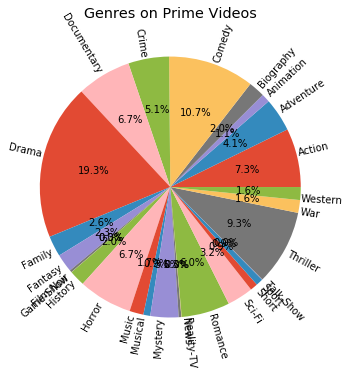

In [32]:
# use pie chart to show the percentage of Prime Video.
plt.figure(figsize=(6,6))
plt.pie(genre_pv['streaming svc'],labels = genre_pv.index, autopct = '%1.1f%%',labeldistance = 1,rotatelabels = True)
plt.title('Genres on Prime Videos')
plt.show()

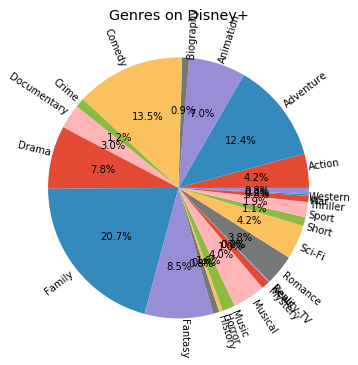

In [33]:
# use pie chart to show the percentage of Disney+.
plt.figure(figsize=(6,6))
plt.pie(genre_ds['streaming svc'],labels = genre_ds.index, autopct = '%1.1f%%',labeldistance = 1,rotatelabels = True)
plt.title('Genres on Disney+')
plt.show()

As the 4 pie charts shown above, for Netflix, Hulu and Prime Video, the main genres of movies are Drama, Comedy and Thriller. Disney+ has the very different top 3 movie genres, which are Family, Comedy and Adventure. Even the family genre occupied more than 20% of the total movies. Going back to the average ratings of IMDb and Rotten Tomatoes ratings, Disney+ got totally opposite ranking. This may reflect the preference of IMDb users and Rotten Tomatoes users are different.

## 2. Are there any differences between the IMDb rating and the Rotten Tomatoes?
IMDb ratings and Rotten Tomatoes are 2 top famous movie comment websites. However, does it mean a high IMDb rating also will get the high Rotten Tomatoes ratings? In this section, the relationship of the two ratings of the same movie will be taken a general view. Firstly, IMDb and Rotten Tomatoes scores (must be both existing) will be selected as a new dataframe rs.

In [34]:
# select all IMDb and Rotten Tomatoes columns both containing valid values.
rs=Movies[['IMDb','Rotten Tomatoes']].dropna().reindex()
# convert rotten tomates rating data type to int
rs['Rotten Tomatoes']=rs['Rotten Tomatoes'].astype('int64')
rs.head()

,IMDb,Rotten Tomatoes
0,8.8,87
1,8.7,87
2,8.5,84
3,8.5,96
4,8.8,97


### 2.1 EDA of IMDb ratings and Rotten Tomatoes ratings

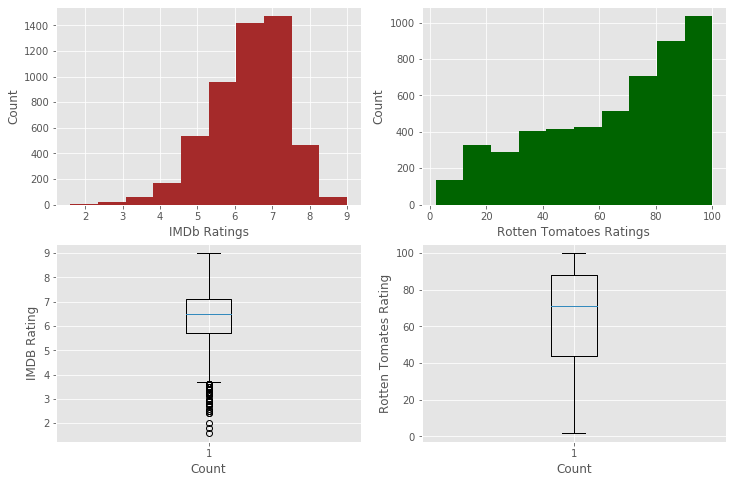

In [35]:
# create subplots for histograms and IMDb and Rotten Tomatoes ratings 
fig, [[ax5,ax6],[ax7,ax8]]=plt.subplots(nrows=2,ncols=2, figsize=(12,8))
# histogram for IMDb Ratings
ax5.hist(rs['IMDb'], color='brown')
ax5.set_xlabel("IMDb Ratings")
ax5.set_ylabel("Count")
# histogram for Rotten Tomatoes Ratings
ax6.hist(rs['Rotten Tomatoes'], color='darkgreen')
ax6.set_xlabel("Rotten Tomatoes Ratings")
ax6.set_ylabel("Count")
# boxplot for IMDb Ratings
ax7.boxplot(rs['IMDb'])
ax7.set_xlabel("Count")
ax7.set_ylabel("IMDB Rating")
# boxplot for Rotten Tomatoes Ratings
ax8.boxplot(rs['Rotten Tomatoes'])
ax8.set_xlabel("Count")
ax8.set_ylabel("Rotten Tomates Rating")
# show the plots
plt.show()

In [36]:
# IMDb rating statistical data
rs['IMDb'].describe()

count    5156.000000
mean        6.375233
std         1.002417
min         1.600000
25%         5.700000
50%         6.500000
75%         7.100000
max         9.000000
Name: IMDb, dtype: float64

In [37]:
# rotten tomatoes rating statistical data
rs['IMDb'].describe()

count    5156.000000
mean        6.375233
std         1.002417
min         1.600000
25%         5.700000
50%         6.500000
75%         7.100000
max         9.000000
Name: IMDb, dtype: float64

The distribution of the 2 types of ratings are similar with the EDA result in 1.1.1. Only the total count changed as missing values of Rotten Tomatoes are more than IMDb rating missing values.<br>
### 2.2 IMDb ratings and Rotten Tomatoes ratings relations
Then, the scatter plot of IMDb ratings and Rotten Tomatoes ratings will be created below.

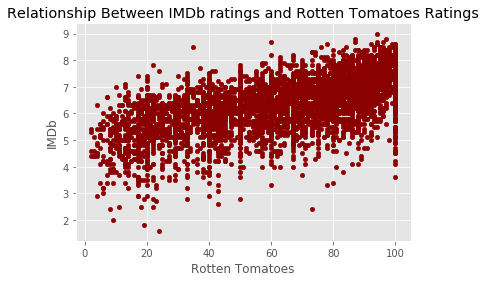

In [38]:
# create scatter plot for rs database
rs.plot.scatter(title='Relationship Between IMDb ratings and Rotten Tomatoes Ratings', y='IMDb',
                      x='Rotten Tomatoes', c='DarkRed')
plt.xticks([100,80,60,40,20,0]) 
plt.show()

In [39]:
# correlation with IMDb ratings and Rotten Tomatoes ratings
rs.corr()

,IMDb,Rotten Tomatoes
IMDb,1.00000,0.61632
Rotten Tomatoes,0.61632,1.00000


As shown in the relationship between IMDb ratings and Rotten Tomatoes ratings scatter plot, it can be seen that the general trend of the 2 ratings systems is the same, if the Rotten Tomatoes ratings are high, the IMDb ratings are more likely to be a high score. After checking the correlation coefficients of IMDb ratings and Rotten Tomatoes ratings, the value is 0.616, which is between 0.5 and 0.7. Therefore, IMDb and Rotten Tomatoes ratings can be considered moderately correlated.

## 3. Is there a difference in movie ratings based on cultural reviewer groups?

Due to cultural background difference, the movies may have different ratings. The native speakers and nonnative speakers of a movie cause different understanding of a movie, as well the aesthetic and story preferences. Douban and KinoPoisk are the 2 candidates for this research. Due to resources availability, KinoPoisk will be used. KinoPoisk is a Russia based movie rating website. It occupies the 3rd place in the world in terms of traffic, giving way to the IMDb portal and the Chinese Douban. The website language is Russian and most of the reviewers are Russian. Therefore, we attempted to use the KinoPoisk ratings and IMDb ratings to check if they could be considered correlated. 
### 3.1 Data acquisition
From the existing database, the movies produced by Russia will be list out below first. Extra information like year and IMDb ratings will also be selected for investigation purposes.

In [40]:
# filter out the movies by country Russia
ru_mo=Movies[['Title','Year','IMDb','Country']]
russia_mov=ru_mo[ru_mo['Country']=='Russia'].dropna()
# get the view of Russian movies
russia_mov.head()

,Title,Year,IMDb,Country
484,Elena,2013,7.6,Russia
1507,Gagarin: First in Space,2013,6.6,Russia
2614,Brother,2019,6.7,Russia
4113,The Snow Queen 3: Fire and Ice,2016,6.2,Russia
4126,Sheep & Wolves,2016,5.8,Russia


A KinoPoisk API is available to request the KinoPoisk ratings and corresponding IMDb ratings by movies ID. As KinoPoisk is a Russian website, the names of the movies are not match. Therefore, the movie titles above need to be manually investigated before the requesting. The KinoPoisk movies ID has been stored in a list movie_ids. Use loop to send request to API and get the information of each movies by turn. All requested information will be stored in a list and converted to JSON file. Due to the limited number of Russian movies in the original dataset, it will be a small sample population. The result is only valid for the current dataset.

In [41]:
# import json and requests
import json
import requests
# define a function to send request by checking movie id, including ratings
def get_movies(movie_id):
    url = "https://kinopoiskapiunofficial.tech/api/v2.1/films/"+movie_id+"?append_to_response=RATING"
    headers = {"accept": "application/json" ,"X-API-KEY": "77456431-acaf-4b6d-9239-f1acccad2de8"}
    response = requests.request("GET", url, headers=headers)
    return response.text
# empty list for requested JSON files
kinopoisk_req=[]
# all movie ids checked before
movie_ids=["501958","676361",'41519','905034','738950','3077','893506','419453','160954','841813','840258','764465','844118',
           '781432','41252','765103','261030','572262','103737','667974','840754',"474233","840161","972325","1108683","13633",
          "309408",'391923']
# call the funcion get_movies to send the request by movie_ids turn
for v in movie_ids:
    p=get_movies(v)
    tojsonlist = json.loads(p)
    kinopoisk_req.append(tojsonlist)

# convert the list to json file for creating dataframe
jsonstr=json.dumps(kinopoisk_req)

In [42]:
# read the json file as dataframe with pd.read_json directly
kinopoisk_df = pd.read_json(jsonstr)
# show the inside layers of dataframe and get the 'nameRu','rating','ratingImdb','countries' information
kinopoisk_title=pd.json_normalize(kinopoisk_df['data'])
kinopoisk_rating=pd.json_normalize(kinopoisk_df['rating'])
kinopoisk=pd.concat([kinopoisk_title,kinopoisk_rating], axis=1)[['nameRu','rating','ratingImdb','countries']]
# check the dataframe
kinopoisk

,nameRu,rating,ratingImdb,countries
0,Елена,7.3,7.3,[{'country': 'Россия'}]
1,Гагарин. Первый в космосе,7.0,6.6,[{'country': 'Россия'}]
2,Брат,8.2,8.0,[{'country': 'Россия'}]
3,Снежная королева 3. Огонь и лед,6.0,6.2,[{'country': 'Россия'}]
4,Волки и овцы: бе-е-е-зумное превращение,6.7,5.8,[{'country': 'Россия'}]
5,Законы беззаконных,0.0,6.0,[{'country': 'США'}]
6,Салют-7,7.4,7.2,[{'country': 'Россия'}]
7,Как я провёл этим летом,6.9,7.0,[{'country': 'Россия'}]
8,Итальянец,7.7,7.5,[{'country': 'Россия'}]
9,Защитники,3.0,3.9,[{'country': 'Россия'}]


### 3.2 EDA of Russian movie ratings
The histograms and boxplots will be created as 2.1. Descriptive summary will also be generated below. 

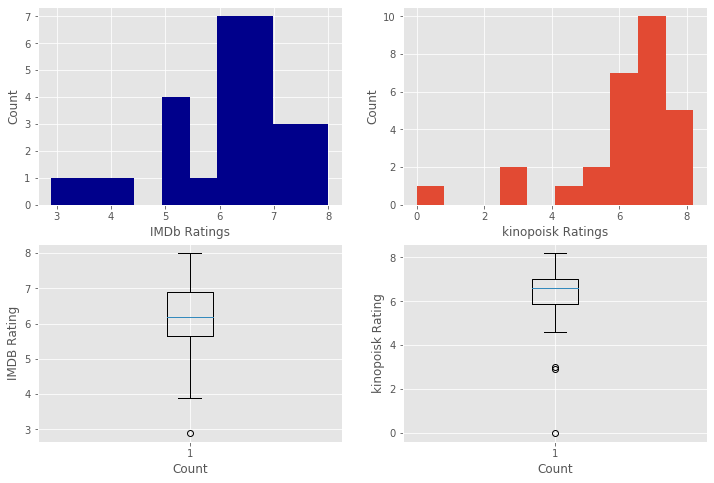

In [43]:
# create subplots for histograms and KinoPoisk and IMDb ratings 
fig, [[ax9,ax10],[ax11,ax12]]=plt.subplots(nrows=2,ncols=2, figsize=(12,8))
# histogram for IMDb Ratings
ax9.hist(kinopoisk['ratingImdb'], color='darkblue')
ax9.set_xlabel("IMDb Ratings")
ax9.set_ylabel("Count")
# histogram for kinopoisk Ratings
ax10.hist(kinopoisk['rating'])
ax10.set_xlabel("kinopoisk Ratings")
ax10.set_ylabel("Count")
# boxplot for IMDb Ratings
ax11.boxplot(kinopoisk['ratingImdb'])
ax11.set_xlabel("Count")
ax11.set_ylabel("IMDB Rating")
# boxplot for kinopoisk Ratings
ax12.boxplot(kinopoisk['rating'])
ax12.set_xlabel("Count")
ax12.set_ylabel("kinopoisk Rating")
# show the plots
plt.show()

In [44]:
# imdb ratings statistical data
kinopoisk['ratingImdb'].describe()

count    28.000000
mean      6.146429
std       1.165073
min       2.900000
25%       5.650000
50%       6.200000
75%       6.900000
max       8.000000
Name: ratingImdb, dtype: float64

In [45]:
# kinopoisk ratings statistical data
kinopoisk['rating'].describe()

count    28.000000
mean      6.110714
std       1.722474
min       0.000000
25%       5.875000
50%       6.600000
75%       7.000000
max       8.200000
Name: rating, dtype: float64

According to the histograms, most of the IMDb and Kinopoisk ratings are more than 5.0. Combining the result of statistical data, we can see the medium value, first quartile and third quartile of Kinopoisk ratings are slightly higher than IMDb ratings, while the mean value of IMDb ratings is higher than Kinopoisk ratings. This may be caused by the outliers. The boxplots showed there are outliers of the two kind of ratings, which means there are a couple of ratings are extremely low. This may be caused by some unpopular movies do not have ratings. 
### 3.3 What are the relationships between the two rating systems?
Scatter plot of the 2 ratings will be create below, and the correlation coefficients will be calculated as well.

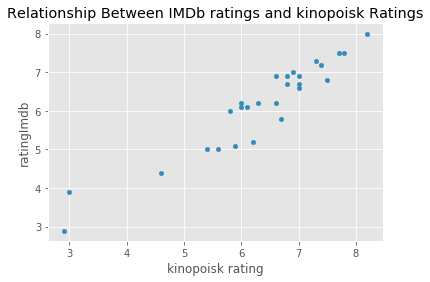

In [46]:
# take out the missing values of kinopoisk ratings
kinopoisk=kinopoisk[kinopoisk['rating']!=0.0]
# create scatter plot for kinopoisk database
kinopoisk.plot.scatter(title='Relationship Between IMDb ratings and kinopoisk Ratings',y='ratingImdb',
                      x='rating')
plt.xlabel("kinopoisk rating")
plt.show()

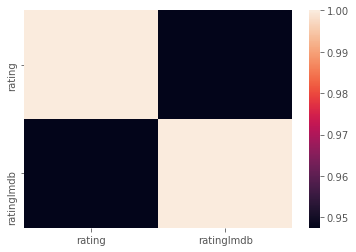

,rating,ratingImdb
rating,1.000000,0.947486
ratingImdb,0.947486,1.000000


In [47]:
# heatmap of the 2 ratings correlation
sns.heatmap(kinopoisk.corr())
plt.show()
# correlation with IMDb ratings and kinopoisk ratings
kinopoisk.corr()

The 2 rating systems are highly correlated as the correlation coefficients is 0.9. That is to say, the native Russian speaker have the same opinion of the Russian movies. The rating may slightly different but the general trend is the same.

## 4. Conclusion
a. The four streaming services average ratings have differences.Prime Video provides the most movies, but the average ratings are not the highest both in IMDb and Rotten Tomatoes. Disney+ and Netflix had a higher IMDb rating, while Hulu and Netflix had a higher Rotten Tomatoes rating according to the given dataset. Overall, Netflix is more trustable to provide a higher quality movie. <br> 
b. English movies has the largest amount, but the average IMDb rating of English movies is the lowest. Hebrew and Swedish language movies got the top 2 highest average IMDb ratings. Telugu and Swedish movies got the top 2 highest average Rotten Tomatoes ratings. Dutch movies are dramatic as IMDb rating is high while Rotten Tomatoes ratings is the lowest. Therefore, the audiences of the 2 rating platforms have different language preferences. <br>
c. Drama, comedies and thrillers are the top three popular movies for Hulu, Netflix and Prime Videos. Disney+ provides totally different genres of movies.Family, adventures and comedies are the top 3 genres. Disney+ may attract more viewers with preferences of the 3 genres. <br>
d. The IMDb ratings and Rotten Tomatoes ratings are moderate correlated based on the existing dataset. Taken Russian movies as example, the IMDb ratings and ratings of non-English rating website are positively correlated. That it to say, superficially the ratings are difference between rating websites, but the affection trends of a specific movie are the same, even across countries. Good movie is a good movie no matter who the audiences are.

## 5. References
https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm<br>
https://pythonspot.com/matplotlib-pie-chart/<br>
https://en.wikipedia.org/wiki/KinoPoisk<br>
https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-movies-on-streaming-platforms-5ea494fee9d2<br>
https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney<br>
https://www.lafabbricadellarealta.com/open-data-entertainment/<br>
https://developers.themoviedb.org/3/getting-started/introduction<br>
http://www.mtv.com/news/movies//<br>
https://en.wikipedia.org/wiki/IMDb#:~:text=Originally%20a%20fan%2Doperated%20website,as%2083%20million%20registered%20users<br>
https://www.pythonfordatascience.org/anova-python/<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html<br>
https://www.dataquest.io/blog/python-api-tutorial/